# Wycena wybranych spółek giełdowych z wykorzystaniem 3 metod

## 1. Metoda oparta o zdyskontowane przepływy pieniężne (DCF)

Zdyskontowane przepływy pieniężne (ang. discounted cash flow, DCF) stanowią jedną z metod wykorzystywaną do wyceny inwestycji, spółki lub innych aktywów bazującą na podejściu rachunku wartości pieniądza w czasie. Polega na szacowaniu i dyskontowaniu wszystkich przyszłych przepływów pieniężnych w celu określenia ich wartości bieżącej. Poziom stopy dyskontowej jest kosztem kapitału i uwzględnia ocenę ryzyka dotyczącego przyszłych przepływów pieniężnych.

Metoda zdyskontowanych przepływów pieniężnych jest szeroko rozpowszechniona w dziedzinie analizy inwestycji finansowych, rozwoju rynku nieruchomości oraz zarządzania korporacyjnego.
Poniższe wyliczenia są oparte na tej metodzie i dostosowane do otoczenia rynkowego na podstawie własnego doświadczenia.

### 1.1 Wczytanie pliku z danymi wycenianych spółek

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plik = pd.ExcelFile('Spółki do wyceny DCF.xlsx') #wczytanie pliku .xls
df_temp = plik.parse() #zamiana tabeli excel na ramkę danych
#df_temp = plik.parse() #zamiana tabeli excel na ramkę danych
df_temp

,Spółka,Raport,Aktualny kurs,Liczba akcji [tys.],Średnie przepływy pieniężne [w tys. PLN],Zysk netto [%]
0,01C (01CYBATON),2020/Q4,7.86,12680,-2087,0.7560
1,06N (06MAGNA),2020/Q3,2.90,13922,19,2.2077
2,08N (08OCTAVA),2020/Q3,0.98,42787,-5021,0.8970
3,11B (11BIT),2020/Q3,530.00,2361,66391,1.2993
4,1AT (ATAL),2020/Q3,42.50,38715,-26997,0.2213
...,...,...,...,...,...,...
797,ZMT (ZAMET),2020/Q3,0.93,105920,9468,-1.5962
798,ZRE (ZREMB),2020/Q3,1.39,12600,372,0.4115
799,ZUE,2020/Q3,5.75,23030,12973,1.0449
800,ZUK (STAPORKOW),2020/Q3,3.92,6504,3862,0.6888


In [3]:
# Sprawdzenie indeksów
df_temp.index

RangeIndex(start=0, stop=802, step=1)

In [4]:
#Sprawdzenie czy nazwa spółki jest unikalna i może być indeksem
df_temp.Spółka.is_unique

True

In [5]:
#ustawienie kolumny Spółka jako indeksu
df_temp.set_index('Spółka', inplace=True)

In [6]:
#Wybór spółek tylko z dodanimi przepływami i wzrostem zysku

df = df_temp[(df_temp['Średnie przepływy pieniężne [w tys. PLN]']>0) & (df_temp['Zysk netto [%]']>0)]
df

,Raport,Aktualny kurs,Liczba akcji [tys.],Średnie przepływy pieniężne [w tys. PLN],Zysk netto [%]
Spółka,,,,,
06N (06MAGNA),2020/Q3,2.90,13922,19,2.2077
11B (11BIT),2020/Q3,530.00,2361,66391,1.2993
3RG (3RGAMES),2020/Q3,1.01,73638,128,0.2402
4MS (4MASS),2020/Q3,0.56,223396,711,1.8871
7LV (7LEVELS),2020/Q4,31.20,575,1387,1.0190
...,...,...,...,...,...
XPL (XPLUS),2020/Q4,2.04,67347,1942,0.8095
XTP (XTPL),2020/Q3,66.80,2029,6515,0.4002
ZRE (ZREMB),2020/Q3,1.39,12600,372,0.4115


### 1.2 Analiza zbioru danych

In [7]:
print ('Ilość spółek:',df.shape[0],'\n')
print ('Ilość atrybutów:',df.shape[1])

Ilość spółek: 330 

Ilość atrybutów: 5


In [8]:
#Typy atrybutów
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 330 entries, 06N (06MAGNA) to ZUK (STAPORKOW)
Data columns (total 5 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Raport                                    330 non-null    object 
 1   Aktualny kurs                             330 non-null    float64
 2   Liczba akcji [tys.]                       330 non-null    int64  
 3   Średnie przepływy pieniężne [w tys. PLN]  330 non-null    int64  
 4   Zysk netto [%]                            330 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 15.5+ KB


In [9]:
#Braki w danych
df.isnull().sum()

Raport                                      0
Aktualny kurs                               0
Liczba akcji [tys.]                         0
Średnie przepływy pieniężne [w tys. PLN]    0
Zysk netto [%]                              0
dtype: int64

In [10]:
#Zamiana wartości NaN na 0
df.fillna(value=0, inplace=True)

C:\Users\30041519\Anaconda3_8\lib\site-packages\pandas\core\frame.py:4147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [11]:
#Sprawdzenie ilości duplikatów
df.duplicated().sum()

0

In [12]:
#Usunięcie duplikatów
if df.duplicated().sum()>0:
    df.drop_duplicates()

In [13]:
#Wskaźniki statystyczne
df.describe()

,Aktualny kurs,Liczba akcji [tys.],Średnie przepływy pieniężne [w tys. PLN],Zysk netto [%]
count,330.000000,3.300000e+02,3.300000e+02,330.000000
mean,35.320667,6.631346e+04,4.359406e+04,8.594237
std,102.304649,3.763281e+05,2.686959e+05,49.170608
min,0.040000,1.640000e+02,1.000000e+00,0.005500
25%,1.562500,5.017500e+03,4.295000e+02,0.373700
50%,5.825000,1.226350e+04,2.786000e+03,0.889700
75%,19.437500,3.269425e+04,1.436925e+04,2.238675
max,982.000000,5.778315e+06,4.407000e+06,553.000000


### 1.3 Parametry badanych spółek

- Aktualna cena rynkowa

In [14]:
df['Aktualny kurs']

Spółka
06N (06MAGNA)        2.90
11B (11BIT)        530.00
3RG (3RGAMES)        1.01
4MS (4MASS)          0.56
7LV (7LEVELS)       31.20
                    ...  
XPL (XPLUS)          2.04
XTP (XTPL)          66.80
ZRE (ZREMB)          1.39
ZUE                  5.75
ZUK (STAPORKOW)      3.92
Name: Aktualny kurs, Length: 330, dtype: float64

- Liczba akcji

In [15]:
df['Liczba akcji [tys.]']

Spółka
06N (06MAGNA)       13922
11B (11BIT)          2361
3RG (3RGAMES)       73638
4MS (4MASS)        223396
7LV (7LEVELS)         575
                    ...  
XPL (XPLUS)         67347
XTP (XTPL)           2029
ZRE (ZREMB)         12600
ZUE                 23030
ZUK (STAPORKOW)      6504
Name: Liczba akcji [tys.], Length: 330, dtype: int64

- Średnie przepływy pieniężne

In [16]:
df['Średnie przepływy pieniężne [w tys. PLN]']

Spółka
06N (06MAGNA)         19
11B (11BIT)        66391
3RG (3RGAMES)        128
4MS (4MASS)          711
7LV (7LEVELS)       1387
                   ...  
XPL (XPLUS)         1942
XTP (XTPL)          6515
ZRE (ZREMB)          372
ZUE                12973
ZUK (STAPORKOW)     3862
Name: Średnie przepływy pieniężne [w tys. PLN], Length: 330, dtype: int64

- Zmiana zysku (w badanym okresie wzrostu)

In [17]:
df['Zysk netto [%]']

Spółka
06N (06MAGNA)      2.2077
11B (11BIT)        1.2993
3RG (3RGAMES)      0.2402
4MS (4MASS)        1.8871
7LV (7LEVELS)      1.0190
                    ...  
XPL (XPLUS)        0.8095
XTP (XTPL)         0.4002
ZRE (ZREMB)        0.4115
ZUE                1.0449
ZUK (STAPORKOW)    0.6888
Name: Zysk netto [%], Length: 330, dtype: float64

- Zmiana zysku po badanym okresie (zakładany spadek o 50%, dodatkowe przepływy po okresie silnego wzrostu)

In [18]:
df['Zysk netto [%]']/2

Spółka
06N (06MAGNA)      1.10385
11B (11BIT)        0.64965
3RG (3RGAMES)      0.12010
4MS (4MASS)        0.94355
7LV (7LEVELS)      0.50950
                    ...   
XPL (XPLUS)        0.40475
XTP (XTPL)         0.20010
ZRE (ZREMB)        0.20575
ZUE                0.52245
ZUK (STAPORKOW)    0.34440
Name: Zysk netto [%], Length: 330, dtype: float64

### 1.4 Parametry wyceny

- Ilość lat (bazowy okres inwestycji)

In [19]:
y=10

- Ilość dodatkowych lat (zakładany dodatkowy okres inwestycji)

In [20]:
ya=20

- Zdyskontowanie (przybliżona wartość, na podstawie kosztu kapitału)

In [21]:
d=0.1

### 1.5 Obliczenie DFCF

In [22]:
def przeplywy(dane):
    
    #Suma zdyskontowanych przepływów w bazowym okresie
    cf=0
    cfl=[0]
    dfcf=0
    dfcft=0
    dpcf=0
    dpcft=0
    
    for i in range(1,y+1):
        cf = dane['Średnie przepływy pieniężne [w tys. PLN]']*1000*(1+dane['Zysk netto [%]']/100)**i   #przepływy w kolejnych latach
        cfl.append(cf)     #dodanie przepływów do listy

        dfcf = cf/((1+d)**i) #zdyskontowane przepływy w kolejnych latach
        dfcft = dfcft+dfcf;  #suma zdyskontowanych przepływów
        
    
    #Suma zdyskontowanych przepływów po bazowym okresie
    
    for i in range(1,ya+1):
        pcf = cfl[y]*(1+(dane['Zysk netto [%]']/100)/2)**i  #przepływy w kolejnych latach zaczynając od końca badanego okresu, założony wzrost zysku o 50% mniejszy
  
        dpcf = pcf/((1+d)**(i+y))#zdyskontowane przepływy w kolejnych latach zaczynając od końca badanego okresu
        dpcft = dpcft+dpcf;      #suma zdyskontowanych przepływów     
            
    return round(dfcft+dpcft,2);


df['Suma zdyskontowanych przepływów DFCF+DPCF']='0'      
df['Suma zdyskontowanych przepływów DFCF+DPCF']=df.apply(przeplywy, axis=1)    


<ipython-input-22-7ae2e0ebc340>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Suma zdyskontowanych przepływów DFCF+DPCF']='0'
<ipython-input-22-7ae2e0ebc340>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Suma zdyskontowanych przepływów DFCF+DPCF']=df.apply(przeplywy, axis=1)


In [23]:
df

,Raport,Aktualny kurs,Liczba akcji [tys.],Średnie przepływy pieniężne [w tys. PLN],Zysk netto [%],Suma zdyskontowanych przepływów DFCF+DPCF
Spółka,,,,,,
06N (06MAGNA),2020/Q3,2.90,13922,19,2.2077,2.140764e+05
11B (11BIT),2020/Q3,530.00,2361,66391,1.2993,6.943434e+08
3RG (3RGAMES),2020/Q3,1.01,73638,128,0.2402,1.229736e+06
4MS (4MASS),2020/Q3,0.56,223396,711,1.8871,7.801721e+06
7LV (7LEVELS),2020/Q4,31.20,575,1387,1.0190,1.418064e+07
...,...,...,...,...,...,...
XPL (XPLUS),2020/Q4,2.04,67347,1942,0.8095,1.952325e+07
XTP (XTPL),2020/Q3,66.80,2029,6515,0.4002,6.339084e+07
ZRE (ZREMB),2020/Q3,1.39,12600,372,0.4115,3.622805e+06


### 1.6 Wycena spółek

- Wartość wewnętrzna na 1 akcje w całym okresie

In [24]:
def wartosc(dane):
    iv = dane['Suma zdyskontowanych przepływów DFCF+DPCF']/dane['Liczba akcji [tys.]']*1000
    return round(iv,2);
    
df['Wartość wewnętrzna na 1 akcje']='0'      
df['Wartość wewnętrzna na 1 akcje']=df.apply(wartosc, axis=1)    
df

<ipython-input-24-70838798bdf9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Wartość wewnętrzna na 1 akcje']='0'
<ipython-input-24-70838798bdf9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Wartość wewnętrzna na 1 akcje']=df.apply(wartosc, axis=1)


,Raport,Aktualny kurs,Liczba akcji [tys.],Średnie przepływy pieniężne [w tys. PLN],Zysk netto [%],Suma zdyskontowanych przepływów DFCF+DPCF,Wartość wewnętrzna na 1 akcje
Spółka,,,,,,,
06N (06MAGNA),2020/Q3,2.90,13922,19,2.2077,2.140764e+05,1.537684e+04
11B (11BIT),2020/Q3,530.00,2361,66391,1.2993,6.943434e+08,2.940887e+08
3RG (3RGAMES),2020/Q3,1.01,73638,128,0.2402,1.229736e+06,1.669975e+04
4MS (4MASS),2020/Q3,0.56,223396,711,1.8871,7.801721e+06,3.492328e+04
7LV (7LEVELS),2020/Q4,31.20,575,1387,1.0190,1.418064e+07,2.466199e+07
...,...,...,...,...,...,...,...
XPL (XPLUS),2020/Q4,2.04,67347,1942,0.8095,1.952325e+07,2.898904e+05
XTP (XTPL),2020/Q3,66.80,2029,6515,0.4002,6.339084e+07,3.124240e+07
ZRE (ZREMB),2020/Q3,1.39,12600,372,0.4115,3.622805e+06,2.875242e+05


- Potencjał wzrostu wg DCF (akceptowalny poziom powyżej 100%)

In [25]:
def wzrost(dane):
    r = (dane['Wartość wewnętrzna na 1 akcje']-dane['Aktualny kurs'])/dane['Aktualny kurs']*100
    return round(r,2);
    
df['Potencjał wzrostu %']='0'      
df['Potencjał wzrostu %']=df.apply(wzrost, axis=1)    
df

<ipython-input-25-b1f89945d6ae>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Potencjał wzrostu %']='0'
<ipython-input-25-b1f89945d6ae>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Potencjał wzrostu %']=df.apply(wzrost, axis=1)


,Raport,Aktualny kurs,Liczba akcji [tys.],Średnie przepływy pieniężne [w tys. PLN],Zysk netto [%],Suma zdyskontowanych przepływów DFCF+DPCF,Wartość wewnętrzna na 1 akcje,Potencjał wzrostu %
Spółka,,,,,,,,
06N (06MAGNA),2020/Q3,2.90,13922,19,2.2077,2.140764e+05,1.537684e+04,5.301359e+05
11B (11BIT),2020/Q3,530.00,2361,66391,1.2993,6.943434e+08,2.940887e+08,5.548833e+07
3RG (3RGAMES),2020/Q3,1.01,73638,128,0.2402,1.229736e+06,1.669975e+04,1.653341e+06
4MS (4MASS),2020/Q3,0.56,223396,711,1.8871,7.801721e+06,3.492328e+04,6.236200e+06
7LV (7LEVELS),2020/Q4,31.20,575,1387,1.0190,1.418064e+07,2.466199e+07,7.904474e+07
...,...,...,...,...,...,...,...,...
XPL (XPLUS),2020/Q4,2.04,67347,1942,0.8095,1.952325e+07,2.898904e+05,1.421021e+07
XTP (XTPL),2020/Q3,66.80,2029,6515,0.4002,6.339084e+07,3.124240e+07,4.676996e+07
ZRE (ZREMB),2020/Q3,1.39,12600,372,0.4115,3.622805e+06,2.875242e+05,2.068509e+07


- Średnioroczny zwrot

In [26]:
def zwrot(dane):
    ar = ((1+dane['Potencjał wzrostu %']/100)**(1/(y+ya))-1)*100
    return ar;
    
df['Średnioroczny zwrot %']='0'      
df['Średnioroczny zwrot %']=df.apply(zwrot, axis=1)    
df

<ipython-input-26-2c9c665be571>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Średnioroczny zwrot %']='0'
<ipython-input-26-2c9c665be571>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Średnioroczny zwrot %']=df.apply(zwrot, axis=1)


,Raport,Aktualny kurs,Liczba akcji [tys.],Średnie przepływy pieniężne [w tys. PLN],Zysk netto [%],Suma zdyskontowanych przepływów DFCF+DPCF,Wartość wewnętrzna na 1 akcje,Potencjał wzrostu %,Średnioroczny zwrot %
Spółka,,,,,,,,,
06N (06MAGNA),2020/Q3,2.90,13922,19,2.2077,2.140764e+05,1.537684e+04,5.301359e+05,33.091086
11B (11BIT),2020/Q3,530.00,2361,66391,1.2993,6.943434e+08,2.940887e+08,5.548833e+07,55.408016
3RG (3RGAMES),2020/Q3,1.01,73638,128,0.2402,1.229736e+06,1.669975e+04,1.653341e+06,38.233388
4MS (4MASS),2020/Q3,0.56,223396,711,1.8871,7.801721e+06,3.492328e+04,6.236200e+06,44.487707
7LV (7LEVELS),2020/Q4,31.20,575,1387,1.0190,1.418064e+07,2.466199e+07,7.904474e+07,57.251857
...,...,...,...,...,...,...,...,...,...
XPL (XPLUS),2020/Q4,2.04,67347,1942,0.8095,1.952325e+07,2.898904e+05,1.421021e+07,48.509233
XTP (XTPL),2020/Q3,66.80,2029,6515,0.4002,6.339084e+07,3.124240e+07,4.676996e+07,54.525064
ZRE (ZREMB),2020/Q3,1.39,12600,372,0.4115,3.622805e+06,2.875242e+05,2.068509e+07,50.379506


## 1.6 Podsumowanie wyników metody opartej o zdyskontowane przepływy pieniężne (DCF)

In [27]:
df[['Aktualny kurs','Wartość wewnętrzna na 1 akcje','Potencjał wzrostu %','Średnioroczny zwrot %']]

,Aktualny kurs,Wartość wewnętrzna na 1 akcje,Potencjał wzrostu %,Średnioroczny zwrot %
Spółka,,,,
06N (06MAGNA),2.90,1.537684e+04,5.301359e+05,33.091086
11B (11BIT),530.00,2.940887e+08,5.548833e+07,55.408016
3RG (3RGAMES),1.01,1.669975e+04,1.653341e+06,38.233388
4MS (4MASS),0.56,3.492328e+04,6.236200e+06,44.487707
7LV (7LEVELS),31.20,2.466199e+07,7.904474e+07,57.251857
...,...,...,...,...
XPL (XPLUS),2.04,2.898904e+05,1.421021e+07,48.509233
XTP (XTPL),66.80,3.124240e+07,4.676996e+07,54.525064
ZRE (ZREMB),1.39,2.875242e+05,2.068509e+07,50.379506


In [28]:
df.describe()

,Aktualny kurs,Liczba akcji [tys.],Średnie przepływy pieniężne [w tys. PLN],Zysk netto [%],Suma zdyskontowanych przepływów DFCF+DPCF,Wartość wewnętrzna na 1 akcje,Potencjał wzrostu %,Średnioroczny zwrot %
count,330.000000,3.300000e+02,3.300000e+02,330.000000,3.300000e+02,3.300000e+02,3.300000e+02,330.000000
mean,35.320667,6.631346e+04,4.359406e+04,8.594237,6.329498e+22,1.188180e+22,3.314809e+22,58.107595
std,102.304649,3.763281e+05,2.686959e+05,49.170608,8.636591e+23,1.844365e+23,5.924433e+23,38.606669
min,0.040000,1.640000e+02,1.000000e+00,0.005500,9.509800e+03,4.174000e+01,1.592500e+04,18.438601
25%,1.562500,5.017500e+03,4.295000e+02,0.373700,4.651899e+06,3.727893e+05,1.116758e+07,47.321261
50%,5.825000,1.226350e+04,2.786000e+03,0.889700,3.065989e+07,3.850644e+06,4.673488e+07,54.521198
75%,19.437500,3.269425e+04,1.436925e+04,2.238675,1.719905e+08,1.707934e+07,1.558009e+08,60.849232
max,982.000000,5.778315e+06,4.407000e+06,553.000000,1.422569e+25,3.292983e+24,1.076138e+25,485.772444


In [29]:
#zmiana indeksu przed rysowaniem wykresu
df.reset_index(inplace=True)

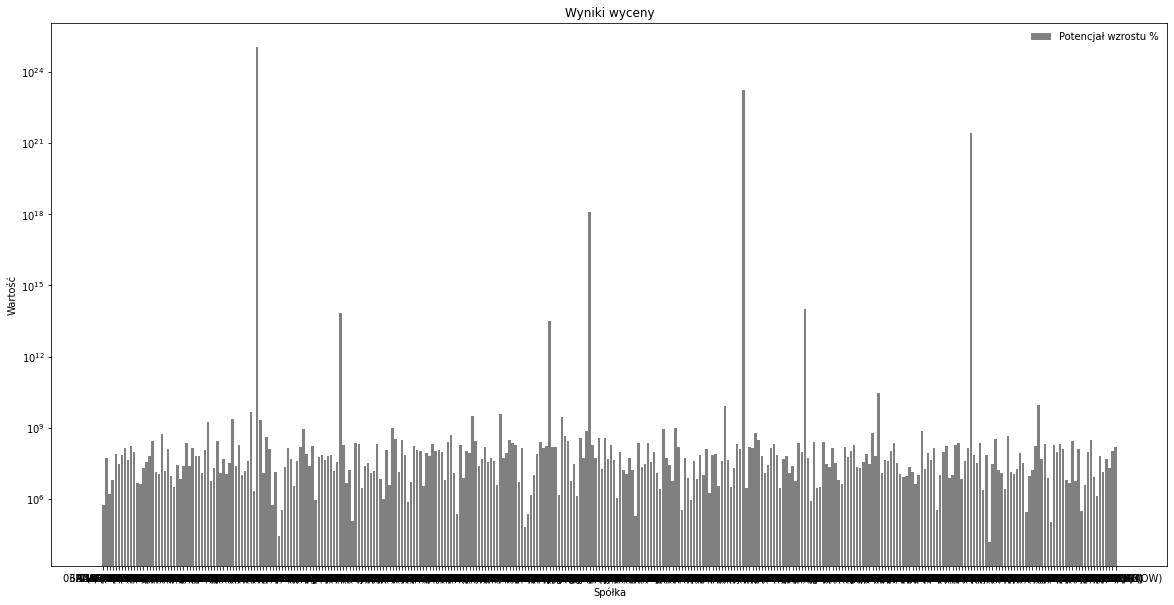

In [30]:
#Wykres osiągniętego potencjału wzrostu % (wykres zlogarytmowany)
plt.figure(figsize=(20, 10))
plt.bar(df['Spółka'],df['Potencjał wzrostu %'], color = 'gray', label = 'Potencjał wzrostu %', log=1)

plt.xticks(df['Spółka'])
 
plt.legend(frameon=False)
plt.xlabel('Spółka')
plt.ylabel('Wartość')
plt.title('Wyniki wyceny');

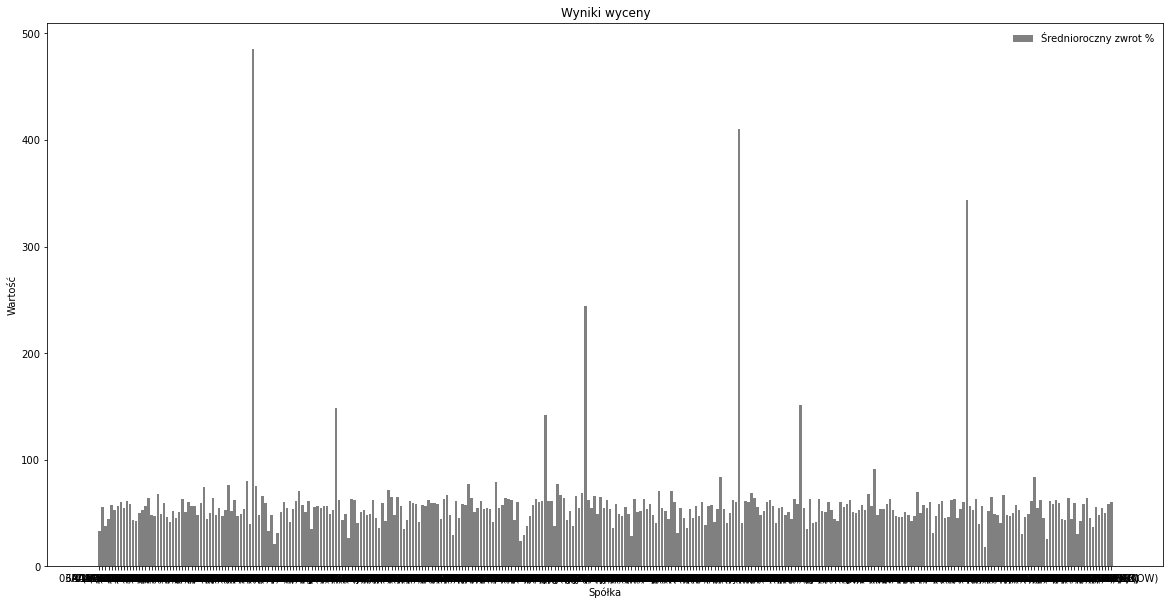

In [31]:
#Wykres osiągniętych średniorocznych zwrotów
plt.figure(figsize=(20, 10))
plt.bar(df['Spółka'],df['Średnioroczny zwrot %'], color = 'gray', label = 'Średnioroczny zwrot %')

plt.xticks(df['Spółka'])
 
plt.legend(frameon=False)
plt.xlabel('Spółka')
plt.ylabel('Wartość')
plt.title('Wyniki wyceny');

In [41]:
#Wybranie tylko spółek o największym potencjale >100%
df[df['Średnioroczny zwrot %']>100]

,Spółka,Raport,Aktualny kurs,Liczba akcji [tys.],Średnie przepływy pieniężne [w tys. PLN],Zysk netto [%],Suma zdyskontowanych przepływów DFCF+DPCF,Wartość wewnętrzna na 1 akcje,Potencjał wzrostu %,Średnioroczny zwrot %
50,BMX (BIOMAXIMA),2020/Q4,30.60,4320,3805,553.0000,1.422569e+25,3.292983e+24,1.076138e+25,485.772444
77,CRJ (CREEPYJAR),2020/Q4,982.00,679,21549,133.1439,4.665376e+14,6.870951e+14,6.996895e+13,148.216232
145,INL (INTROL),2020/Q3,4.98,25704,26467,107.3550,4.230710e+13,1.645935e+12,3.305090e+13,142.087728
158,JRH (JRHOLDING),2020/Q3,13.75,39000,2955,277.2895,6.590549e+18,1.689884e+17,1.229007e+18,243.809978
208,MRC (MERCATOR),2020/Q3,359.00,10605,366052,434.9334,6.659977e+24,6.280035e+23,1.749313e+23,410.617372
228,OPM (OPTEAM),2020/Q4,16.50,7872,18553,122.1635,1.358280e+14,1.725458e+13,1.045732e+14,151.563335
282,SNG (SYNERGA),2020/Q3,0.24,273100,70,440.4800,1.672575e+21,6.124404e+18,2.551835e+21,343.501493


In [43]:
#Wybranie 20 spółek o największym potencjale
df.sort_values(by=['Średnioroczny zwrot %'], ascending=False).head(20)

,Spółka,Raport,Aktualny kurs,Liczba akcji [tys.],Średnie przepływy pieniężne [w tys. PLN],Zysk netto [%],Suma zdyskontowanych przepływów DFCF+DPCF,Wartość wewnętrzna na 1 akcje,Potencjał wzrostu %,Średnioroczny zwrot %
50,BMX (BIOMAXIMA),2020/Q4,30.60,4320,3805,553.0000,1.422569e+25,3.292983e+24,1.076138e+25,485.772444
208,MRC (MERCATOR),2020/Q3,359.00,10605,366052,434.9334,6.659977e+24,6.280035e+23,1.749313e+23,410.617372
282,SNG (SYNERGA),2020/Q3,0.24,273100,70,440.4800,1.672575e+21,6.124404e+18,2.551835e+21,343.501493
158,JRH (JRHOLDING),2020/Q3,13.75,39000,2955,277.2895,6.590549e+18,1.689884e+17,1.229007e+18,243.809978
228,OPM (OPTEAM),2020/Q4,16.50,7872,18553,122.1635,1.358280e+14,1.725458e+13,1.045732e+14,151.563335
77,CRJ (CREEPYJAR),2020/Q4,982.00,679,21549,133.1439,4.665376e+14,6.870951e+14,6.996895e+13,148.216232
145,INL (INTROL),2020/Q3,4.98,25704,26467,107.3550,4.230710e+13,1.645935e+12,3.305090e+13,142.087728
252,PST (PRESTO),2018/Q3,0.04,28839,28785,2.6571,3.366938e+08,1.167495e+07,2.918736e+10,91.501933
304,TMP (TELEMEDPL),2020/Q4,1.60,8682,1918,39.6250,1.239161e+09,1.427276e+08,8.920472e+09,84.082680
202,MNX (MINOX),2018/Q3,0.07,26174,4399,13.7117,1.447289e+08,5.529492e+06,7.899275e+09,83.338177
